# EDA Netflix 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data into DataFrame

In [2]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Checking shape and data types of columns of dataframe

In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Spliting and Stacking Cast column

In [3]:
dummy =df['cast'].apply(lambda x:str(x).split(',')).tolist()
df_new = pd.DataFrame(dummy,index = df['title'])
df_new = df_new.stack()
df_new = pd.DataFrame(df_new)
df_new.reset_index(inplace = True)
df_new = df_new[['title',0]]
df_new.columns = ['title','Cast']

In [7]:
df_new.head()

,title,Cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


# Spliting and Stacking director column

In [8]:
directors =df['director'].apply(lambda x:str(x).split(',')).tolist()
df_director = pd.DataFrame(directors,index = df['title'])
df_director = df_director.stack()
df_director = pd.DataFrame(df_director)
df_director.reset_index(inplace = True)
df_director = df_director[['title',0]]
df_director.columns = ['title','Director']

In [10]:
df_director.head(10)

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


# Spliting and Stacking listed_in column

In [11]:
lists =df['listed_in'].apply(lambda x:str(x).split(',')).tolist()
df_list = pd.DataFrame(lists,index = df['title'])
df_list = df_list.stack()
df_list = pd.DataFrame(df_list)
df_list.reset_index(inplace = True)
df_list = df_list[['title',0]]
df_list.columns = ['title','Listed_in']

In [12]:
df_list.head(10)

,title,Listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
5,Ganglands,International TV Shows
6,Ganglands,TV Action & Adventure
7,Jailbirds New Orleans,Docuseries
8,Jailbirds New Orleans,Reality TV
9,Kota Factory,International TV Shows


# Spliting and Stacking country column

In [13]:
lists =df['country'].apply(lambda x:str(x).split(',')).tolist()
df_country = pd.DataFrame(lists,index = df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace = True)
df_country = df_country[['title',0]]
df_country.columns = ['title','country']

In [14]:
df_country.head(10)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
5,Midnight Mass,nan
6,My Little Pony: A New Generation,nan
7,Sankofa,United States
8,Sankofa,Ghana
9,Sankofa,Burkina Faso


# Merging df_new and df_director

In [15]:
df_final = pd.merge(df_new,df_director,on = 'title')

# Merging df_list and df_final
# Merging df_country and df_final
# Merging df_final with origional dataset to get out final Dataframe

In [16]:
df_final = pd.merge(df_final,df_list,on = 'title')
df_final = pd.merge(df_final,df_country,on = 'title')
df_final = pd.merge(df,df_final,on='title')

# Reading final dataframe and cheking columns

In [17]:
df_final.head(10)

,show_id,type,title,director,cast,country_x,date_added,release_year,rating,duration,listed_in,description,Cast,Director,Listed_in,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,Documentaries,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,International TV Shows,South Africa
5,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,TV Dramas,South Africa
6,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,TV Mysteries,South Africa
7,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane,nan,International TV Shows,South Africa
8,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane,nan,TV Dramas,South Africa
9,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane,nan,TV Mysteries,South Africa


In [18]:
df_final.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country_x',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'Cast', 'Director', 'Listed_in', 'country_y'],
      dtype='object')

# Dropping unwanted columns from DataFrame

In [19]:
df_final.drop(['show_id','director', 'cast', 'country_x','listed_in','description',],axis = 1,inplace = True)
df_final.rename(columns = {'Listed_in':'genre','country_y':'country'},inplace=True)

In [20]:
df_final.head()

,type,title,date_added,release_year,rating,duration,Cast,Director,genre,country
0,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,nan,Kirsten Johnson,Documentaries,United States
1,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,nan,International TV Shows,South Africa
2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,nan,TV Dramas,South Africa
3,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,nan,TV Mysteries,South Africa
4,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Khosi Ngema,nan,International TV Shows,South Africa


In [21]:
df_final.shape

(202065, 10)

# Re-aranging order of columns

In [22]:
df_final = df_final.iloc[:,[0,1,6,7,8,9,2,3,4,5]]

In [24]:
df_final.head()

,type,title,Cast,Director,genre,country,date_added,release_year,rating,duration
0,Movie,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States,"September 25, 2021",2020,PG-13,90 min
1,TV Show,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,TV Show,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
3,TV Show,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
4,TV Show,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons


# Percentage of missing values for each columns

In [25]:
(df_final.isna().sum()*100/df_final.shape[0]).sort_values(ascending = False)

date_added      0.078193
rating          0.033158
duration        0.001485
type            0.000000
title           0.000000
Cast            0.000000
Director        0.000000
genre           0.000000
country         0.000000
release_year    0.000000
dtype: float64

# From above code we can see that many columns has zero missing value in column but they have values nan in columns which means those are in string format
# Finding 'nan' in columns and replacing them with np.nan

# Replacing 'nan' with np.nan in 'Cast'

In [26]:
def func(value):
    if value == 'nan':
        return np.nan
    else:
        return value
df_final['Cast'] = df_final['Cast'].apply(func)

# Replacing 'nan' with np.nan in 'Director'

In [27]:
def fun(value):
    if value == 'nan':
        return np.nan
    else:
        return value
df_final['Director'] = df_final['Director'].apply(fun)

# Replacing 'nan' with np.nan in 'genre'

In [28]:
def fun(value):
    if value == 'nan':
        return np.nan
    else:
        return value
df_final['genre'] = df_final['genre'].apply(fun)

# Replacing 'nan' with np.nan in 'country'

In [29]:
def func(value):
    if value == 'nan':
        return np.nan
    else:
        return value
df_final['country'] = df_final['country'].apply(func)

# Checking for missing value percentage again 

In [30]:
(df_final.isna().sum()*100/df_final.shape[0]).sort_values(ascending = False)

Director        25.062727
country          5.887709
Cast             1.063519
date_added       0.078193
rating           0.033158
duration         0.001485
type             0.000000
title            0.000000
genre            0.000000
release_year     0.000000
dtype: float64

# Dealing with Missing Values and Replacing NaN with mode value of respective Column

In [31]:
df_final['Cast'] = df_final['Cast'].fillna(df_final['Cast'].mode()[0])
df_final['Director'] = df_final['Director'].fillna(df_final['Director'].mode()[0])
df_final['date_added'] = df_final['date_added'].fillna(df_final['date_added'].mode()[0])
df_final['rating'] = df_final['rating'].fillna(df_final['rating'].mode()[0])
df_final['duration'] = df_final['duration'].fillna(df_final['duration'].mode()[0])
df_final['country'] = df_final['country'].fillna(df_final['country'].mode()[0])

# Re-checking missing values after fixing them

In [32]:
(df_final.isna().sum()*100/df_final.shape[0]).sort_values(ascending = False)

type            0.0
title           0.0
Cast            0.0
Director        0.0
genre           0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
dtype: float64

# Fixing rating columns with useable values and converting datatype to integers

In [33]:
df_final['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [34]:
def fun(x):
    if x == '74 min' or x == '84 min' or x == '66 min':
        return 'normal'
    else:
        return x
df_final['rating'] = df_final['rating'].apply(fun)

In [35]:
df_final['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'normal', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

# Fixing duration columns with useable values and converting datatype to integers ease in calculation

In [38]:
def fun(x):
    return str(x).split()[0]
df_final['duration'] = df_final['duration'].apply(fun)
convert_dict = {'duration': int}
df_final = df_final.astype(convert_dict)

In [39]:
df_final['duration']

0          90
1           2
2           2
3           2
4           2
         ... 
202060    111
202061    111
202062    111
202063    111
202064    111
Name: duration, Length: 202065, dtype: int32

# Changing datatype of date_added columns

In [40]:
df_final['date_added'] = pd.to_datetime(df_final['date_added'])

# Checking Distribution of content month wise for India  

In [52]:
content_per_month = df_final.loc[df_final['country'] == 'India',['country','title','date_added']].reset_index()
content_per_month

,index,country,title,date_added
0,87,India,Kota Factory,2021-09-24
1,88,India,Kota Factory,2021-09-24
2,89,India,Kota Factory,2021-09-24
3,90,India,Kota Factory,2021-09-24
4,91,India,Kota Factory,2021-09-24
...,...,...,...,...
22134,202060,India,Zubaan,2019-03-02
22135,202061,India,Zubaan,2019-03-02
22136,202062,India,Zubaan,2019-03-02
22137,202063,India,Zubaan,2019-03-02


# Reccommendation.
# Count of Content is higher in month of December while is relativly less around may-june so this can be interchanged as around december academic sessions are usually moving towards exams while may-june are supposed to be holidays 

<AxesSubplot:xlabel='date_added'>

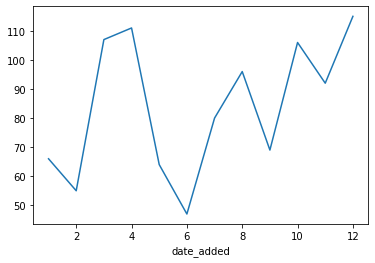

In [56]:
content_distribution_by_month = content_per_month.groupby(content_per_month['date_added'].dt.month)['title'].nunique()
content_distribution_by_month.plot()

# Insight
# count of content per year has shown an increasing trend from 2008 to 2020 then a slight fall but overall it was increasing

<AxesSubplot:xlabel='date_added'>

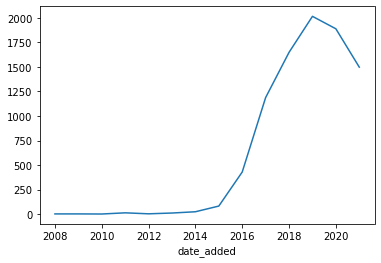

In [57]:
content_per_year = df_final.groupby(df_final['date_added'].dt.year)['title'].nunique()
content_per_year.plot()

# Insight
# average watch time for movies is 106.83 min while average watch time for TV show is 1.92 season

In [58]:
df_final.groupby(df_final['type'])['duration'].mean()

type
Movie      106.838209
TV Show      1.928101
Name: duration, dtype: float64

# Insights.
# Netflix has more content in form of movies for which average duration is 106 min while TV show has average duration is 1.92 seasons 

# Reccommendations.
# Netflix should give emphasis on increasing TV shows as they have season so if someone watches a season they will give more time Netflix as compare to movies hence increses Watch hours

<AxesSubplot:xlabel='type', ylabel='count'>

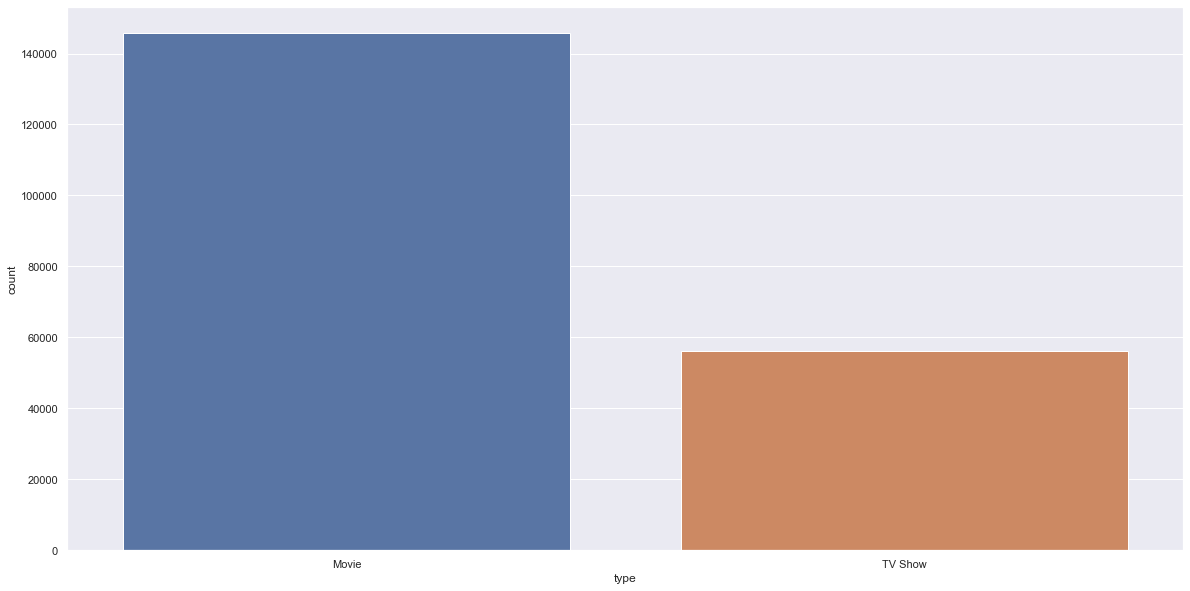

In [115]:
sns.countplot(x ='type', data = df_final)


# Insight
# count of content per year has shown an increasing trend from 2008 to 2020 then a slight fall but overall it was increasing

Text(0.5, 1.0, 'Number of Movies or shows per year')

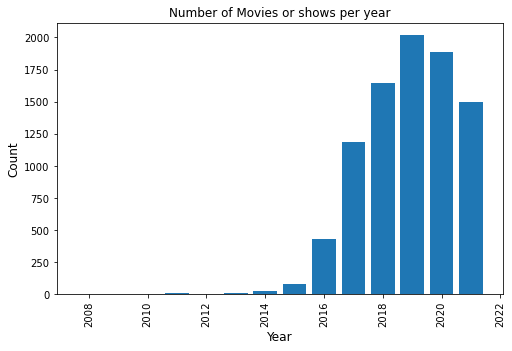

In [73]:
content_per_year = df_final.groupby(df_final['date_added'].dt.year)['title'].nunique()
a = content_per_year.reset_index()
plt.figure(figsize=(8,5))
plt.bar(a['date_added'],a['title'])
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of Movies or shows per year")

# INSIGHT.
# Maximum Content present on netflix is from International movie genre followed by Dramas and the Comedy 

# RECCOMMENDATION.
# There are very less Content from Sci-Fi and Romantic movies which are very popular genre and has a huge fan base so netflix should add these genre into its list


Text(0.5, 1.0, 'Number of Movies or shows per genre')

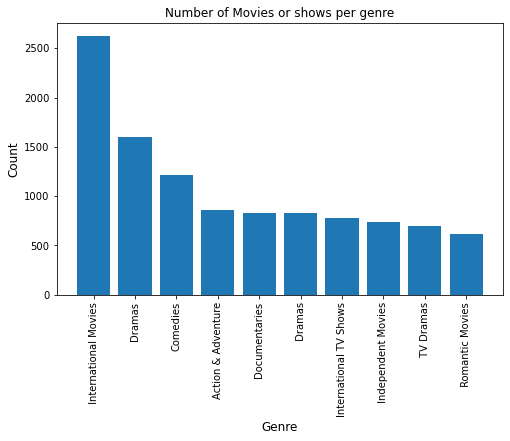

In [78]:
content_by_genre = df_final.groupby(df_final['genre'])['title'].nunique().sort_values(ascending = False).reset_index()
content_by_genre.head(10)
plt.figure(figsize=(8,5))
plt.bar(content_by_genre['genre'][:10],content_by_genre['title'][:10])
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of Movies or shows per genre")

# Insight
# Netflix has maximum content of rating TV-MA(For Mature Audiences) and   followed by TV-14(Parents strongly cautioned. May not be suitable for ages under 14.)
# Reccomendation
# Netflix should bring some kids friendly content in order to gain more traffic,kids do watch and other stuff so if kids frirndly content is available on Netflix then they will definitly use it. 
# Refrence- https://help.netflix.com/en/node/2064/us(for understanding rating legends)

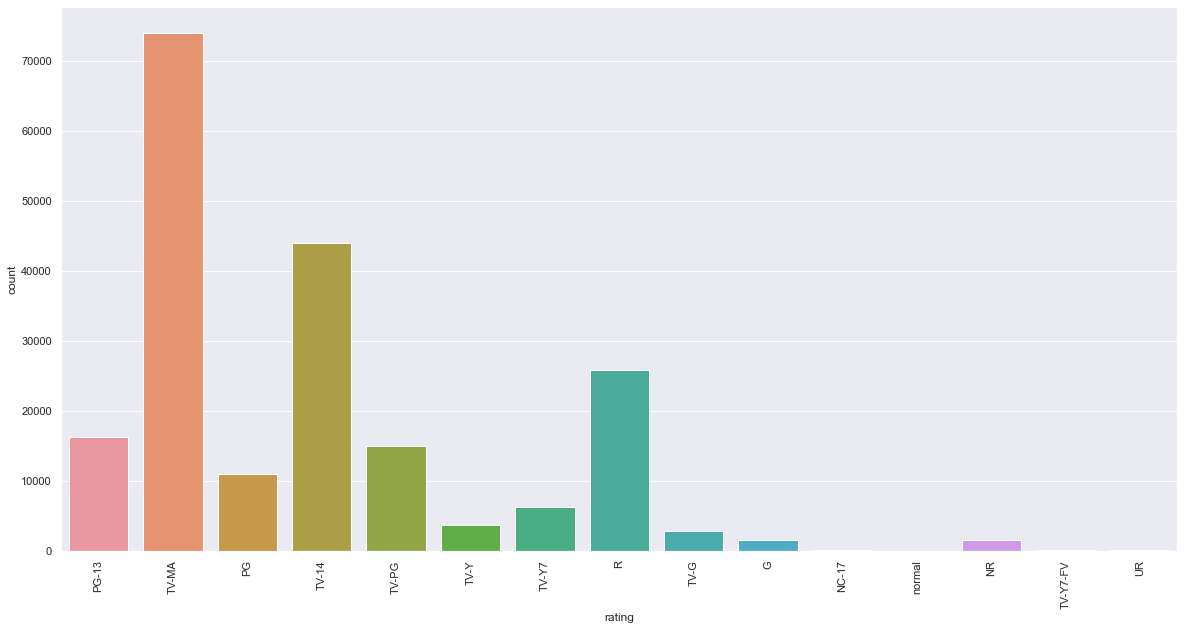

In [88]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x ='rating', data = df_final)
plt.xticks(rotation=90)
plt.show()

# Distribution of Content country wise 
# Insights
# India has Comedy movies but comedy TV shows count is neglegible same is visible with USA and if we Consider Japan sp japan has content from very few catagories 
# Reccommendation 
# Neflix must increase content genre wise in order to engage more and more traffic

<AxesSubplot:xlabel='country', ylabel='title'>

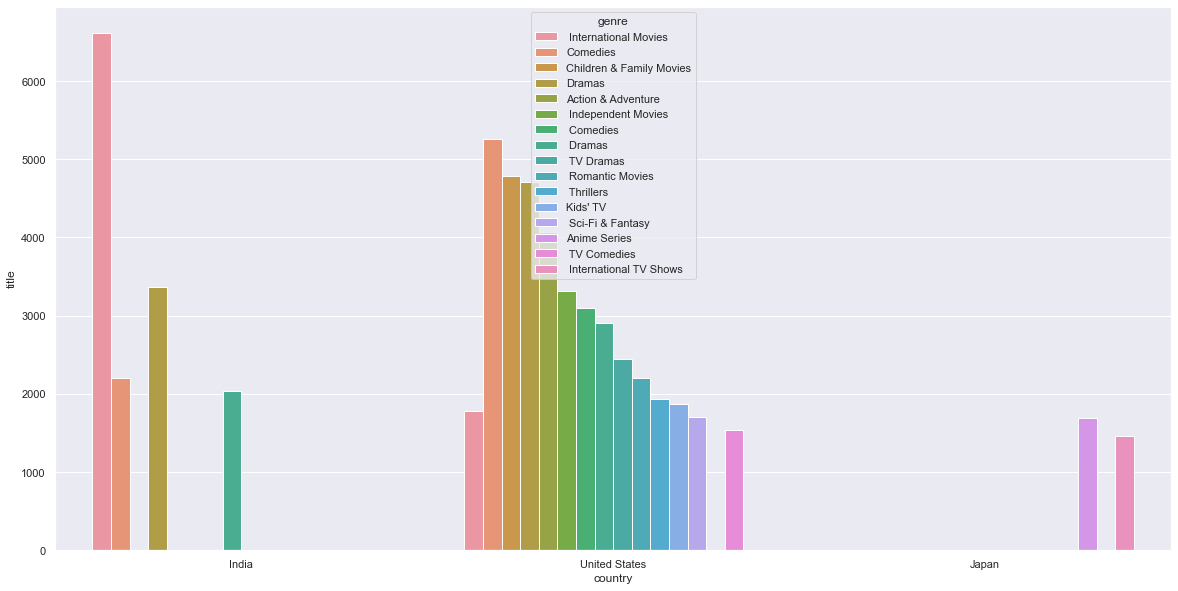

In [108]:
a = df_final.groupby(['country','genre'])['title'].count().sort_values(ascending = False).reset_index().head(20)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='country',y='title',hue='genre',data=a)
